# Import Library

In [1]:
!pip install pingouin
!pip install factor-analyzer
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=5e4f20c32e8355c98d2956ef60bfaf5509e86249244f897db8b99ebf7951e147
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor-analyzer
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 12.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import pingouin as pg
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
import re
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Read CSV

In [3]:
df = pd.read_csv('/content/DataBefore_2.csv')
df.head(5)

,Timestamp,Jurusan,Berapa rata-rata waktu penggunaan layar smartphone (screen time) harian kamu (dalam satuan jam)?,"Dari total screen time smartphone kamu, jenis aplikasi apa yang paling banyak menghabiskan waktumu?","Seberapa sering kamu merasa terganggu oleh penggunaan smartphone untuk hal non-akademik (e.g. sosial media, game, streaming video) saat sedang belajar?",Apakah kamu pernah secara sadar mengurangi penggunaan smartphone pada semester kemarin?,Apa alasan utama kamu mengurangi penggunaan smartphone pada semester kemarin?,Berapa range Grade Point Semester (GPS) kamu pada semester ganjil 2024/2025?,"Menurut kamu, bagaimana efek dari screen time terhadap performa akademik pada semester kemarin (semester ganjil 2024/2025)?",Bagaimana kebiasaan screen time memengaruhi performamu dalam belajar di semester ganjil 2024/2025.
0,21/05/2025 17:36:44,Data Science,6 - 8 jam,"Social (WhatsApp, LINE, Instagram, X, Tiktok),...",3,Pernah,Karena merasa waktu terlalu banyak dihabiskan ...,3.00 - 3.49,4,membantu saya untuk rehat sejenak ketika sudah...
1,21/05/2025 17:36:51,Data Science,2 - 4 jam,"Social (WhatsApp, LINE, Instagram, X, Tiktok),...",2,Pernah,"Agar lebih fokus belajar, Karena merasa waktu ...",3.00 - 3.49,3,mengganggu konsentrasi
2,21/05/2025 17:43:14,Data Science,> 8 jam,"Video (YouTube, Netflix), Games (Fortnite, Mob...",5,Tidak,NaN,3.5 - 3.89,4,sering menggunakan untuk hal produktif
3,21/05/2025 18:03:43,Data Science,4 - 6 jam,"Social (WhatsApp, LINE, Instagram, X, Tiktok),...",3,Pernah,Karena merasa waktu terlalu banyak dihabiskan ...,3.5 - 3.89,3,"tergantung, karena jika kebanyakan screen time..."
4,21/05/2025 18:08:16,Data Science,6 - 8 jam,"Social (WhatsApp, LINE, Instagram, X, Tiktok),...",5,Tidak,NaN,3.5 - 3.89,3,screen time handphone dapat membuat saya kehil...


# EDA

In [4]:
print(df.columns)

Index(['Timestamp', 'Jurusan',
       'Berapa rata-rata waktu penggunaan layar smartphone (screen time) harian kamu (dalam satuan jam)?',
       'Dari total screen time smartphone kamu, jenis aplikasi apa yang paling banyak menghabiskan waktumu?  ',
       'Seberapa sering kamu merasa terganggu oleh penggunaan smartphone untuk hal non-akademik (e.g. sosial media, game, streaming video) saat sedang belajar?  ',
       'Apakah kamu pernah secara sadar mengurangi penggunaan smartphone pada semester kemarin?',
       'Apa alasan utama kamu mengurangi penggunaan smartphone pada semester kemarin?',
       'Berapa range Grade Point Semester (GPS) kamu pada semester ganjil 2024/2025?',
       'Menurut kamu, bagaimana efek dari screen time terhadap performa akademik pada semester kemarin (semester ganjil 2024/2025)?',
       'Bagaimana kebiasaan screen time memengaruhi performamu dalam belajar di semester ganjil 2024/2025.'],
      dtype='object')


column rename is used to make the data easier to read and process.

In [5]:
df = df.rename(columns={'Jurusan': 'major',
                        'Berapa rata-rata waktu penggunaan layar smartphone (screen time) harian kamu (dalam satuan jam)?': 'screentime_spend',
                        'Dari total screen time smartphone kamu, jenis aplikasi apa yang paling banyak menghabiskan waktumu?  ':'screentime_app',
                        'Seberapa sering kamu merasa terganggu oleh penggunaan smartphone untuk hal non-akademik (e.g. sosial media, game, streaming video) saat sedang belajar?  ': 'phone_distraction_freq',
                        'Apakah kamu pernah secara sadar mengurangi penggunaan smartphone pada semester kemarin?': 'reduced_phone_use',
                        'Apa alasan utama kamu mengurangi penggunaan smartphone pada semester kemarin?': 'reduction_reason',
                        'Berapa range Grade Point Semester (GPS) kamu pada semester ganjil 2024/2025?':'GPS',
                        'Menurut kamu, bagaimana efek dari screen time terhadap performa akademik pada semester kemarin (semester ganjil 2024/2025)?':'screentime_impact',
                        'Bagaimana kebiasaan screen time memengaruhi performamu dalam belajar di semester ganjil 2024/2025.': 'screentime_on_learning'})
df.head(5)


,Timestamp,major,screentime_spend,screentime_app,phone_distraction_freq,reduced_phone_use,reduction_reason,GPS,screentime_impact,screentime_on_learning
0,21/05/2025 17:36:44,Data Science,6 - 8 jam,"Social (WhatsApp, LINE, Instagram, X, Tiktok),...",3,Pernah,Karena merasa waktu terlalu banyak dihabiskan ...,3.00 - 3.49,4,membantu saya untuk rehat sejenak ketika sudah...
1,21/05/2025 17:36:51,Data Science,2 - 4 jam,"Social (WhatsApp, LINE, Instagram, X, Tiktok),...",2,Pernah,"Agar lebih fokus belajar, Karena merasa waktu ...",3.00 - 3.49,3,mengganggu konsentrasi
2,21/05/2025 17:43:14,Data Science,> 8 jam,"Video (YouTube, Netflix), Games (Fortnite, Mob...",5,Tidak,NaN,3.5 - 3.89,4,sering menggunakan untuk hal produktif
3,21/05/2025 18:03:43,Data Science,4 - 6 jam,"Social (WhatsApp, LINE, Instagram, X, Tiktok),...",3,Pernah,Karena merasa waktu terlalu banyak dihabiskan ...,3.5 - 3.89,3,"tergantung, karena jika kebanyakan screen time..."
4,21/05/2025 18:08:16,Data Science,6 - 8 jam,"Social (WhatsApp, LINE, Instagram, X, Tiktok),...",5,Tidak,NaN,3.5 - 3.89,3,screen time handphone dapat membuat saya kehil...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Timestamp               86 non-null     object
 1   major                   86 non-null     object
 2   screentime_spend        86 non-null     object
 3   screentime_app          86 non-null     object
 4   phone_distraction_freq  86 non-null     int64 
 5   reduced_phone_use       86 non-null     object
 6   reduction_reason        46 non-null     object
 7   GPS                     86 non-null     object
 8   screentime_impact       86 non-null     int64 
 9   screentime_on_learning  86 non-null     object
dtypes: int64(2), object(8)
memory usage: 6.8+ KB


In [7]:
df.isnull().sum()

,0
Timestamp,0
major,0
screentime_spend,0
screentime_app,0
phone_distraction_freq,0
reduced_phone_use,0
reduction_reason,40
GPS,0
screentime_impact,0
screentime_on_learning,0


Null value only appear in column reduction reason, this is because of this question only have to be answaers by the one

In [8]:
df = df.fillna(0)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df = df.drop(['Timestamp'], axis = 1)
df.head(5)

,major,screentime_spend,screentime_app,phone_distraction_freq,reduced_phone_use,reduction_reason,GPS,screentime_impact,screentime_on_learning
0,Data Science,6 - 8 jam,"Social (WhatsApp, LINE, Instagram, X, Tiktok),...",3,Pernah,Karena merasa waktu terlalu banyak dihabiskan ...,3.00 - 3.49,4,membantu saya untuk rehat sejenak ketika sudah...
1,Data Science,2 - 4 jam,"Social (WhatsApp, LINE, Instagram, X, Tiktok),...",2,Pernah,"Agar lebih fokus belajar, Karena merasa waktu ...",3.00 - 3.49,3,mengganggu konsentrasi
2,Data Science,> 8 jam,"Video (YouTube, Netflix), Games (Fortnite, Mob...",5,Tidak,0,3.5 - 3.89,4,sering menggunakan untuk hal produktif
3,Data Science,4 - 6 jam,"Social (WhatsApp, LINE, Instagram, X, Tiktok),...",3,Pernah,Karena merasa waktu terlalu banyak dihabiskan ...,3.5 - 3.89,3,"tergantung, karena jika kebanyakan screen time..."
4,Data Science,6 - 8 jam,"Social (WhatsApp, LINE, Instagram, X, Tiktok),...",5,Tidak,0,3.5 - 3.89,3,screen time handphone dapat membuat saya kehil...


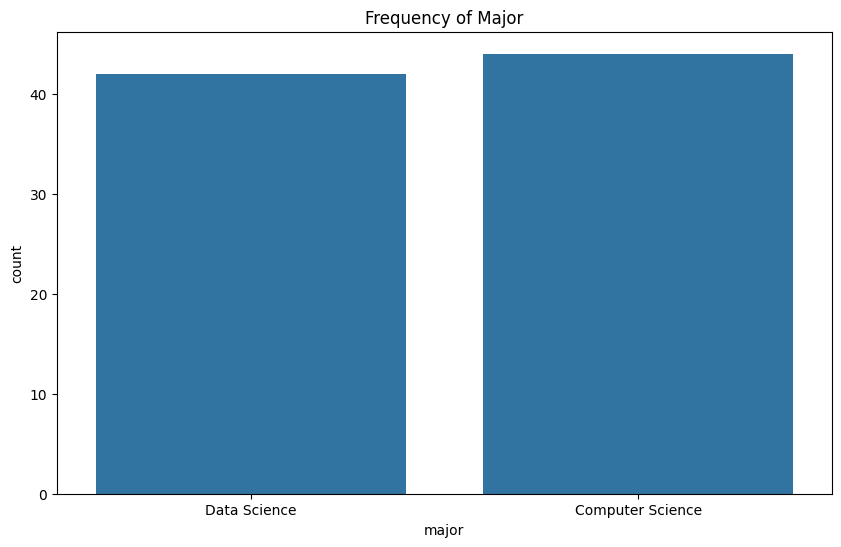

In [11]:
plt.figure(figsize=(10, 6))
plt.title('Frequency of Major')
sns.countplot(data=df, x='major')
plt.show()

In [12]:
df['major'].value_counts()

,count
major,
Computer Science,44
Data Science,42


In [13]:
weights = {
    'Computer Science': 600 / 44,
    'Data Science': 185 / 42
}
df['weight'] = df['major'].map(weights)

In [14]:
def weighted_quantile(values, quantiles, sample_weight):
    sorter = np.argsort(values)
    values = np.array(values)[sorter]
    weights = np.array(sample_weight)[sorter]
    cumulative_weight = np.cumsum(weights)
    normalized_weight = cumulative_weight / cumulative_weight[-1]
    return np.interp(quantiles, normalized_weight, values)

def weighted_describe(series, weights):
    values = series.to_numpy()
    w = weights.to_numpy()

    mean = np.average(values, weights=w)
    variance = np.average((values - mean)**2, weights=w)
    std = np.sqrt(variance)
    q1, q2, q3 = weighted_quantile(values, [0.25, 0.5, 0.75], w)

    return pd.Series({
        'count': len(values),
        'mean': mean,
        'std': std,
        'min': values.min(),
        '25%': q1,
        '50%': q2,
        '75%': q3,
        'max': values.max()
    })

cols = ['screentime_impact', 'phone_distraction_freq']
weighted_summary = pd.DataFrame({col: weighted_describe(df[col], df['weight']) for col in cols})
weighted_summary = weighted_summary

print(weighted_summary)

       screentime_impact  phone_distraction_freq
count          86.000000               86.000000
mean            2.865029                3.776863
std             0.964751                1.088873
min             1.000000                1.000000
25%             2.000000                3.000000
50%             3.000000                4.000000
75%             4.000000                5.000000
max             5.000000                5.000000


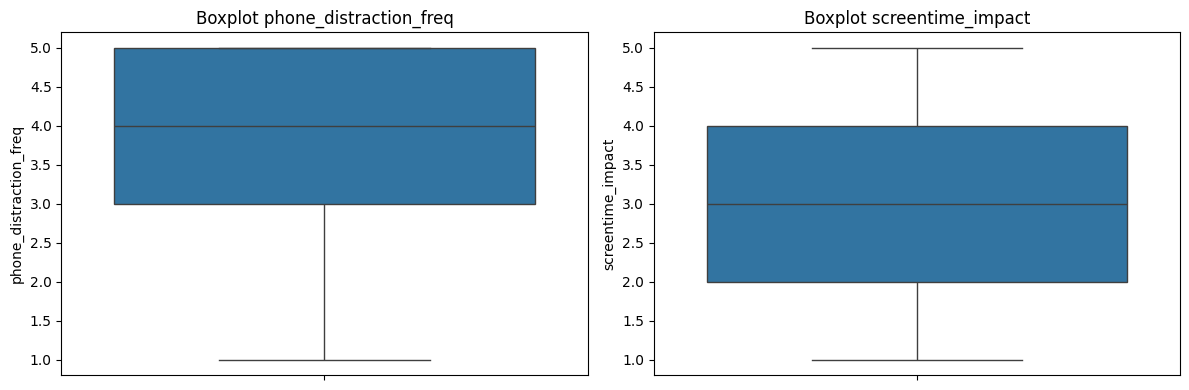

In [15]:
numerical = ['phone_distraction_freq', 'screentime_impact']

def check_dist_outliers(df, cols):
    plt.figure(figsize=(12, 4))

    for i, col in enumerate(cols):
        plt.subplot(1, 2, i + 1)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot {col}')

    plt.tight_layout()
    plt.show()

check_dist_outliers(df, numerical)

From the boxplots above, we can see that the screen time impact varies greatly between individuals. Therefore, we cannot directly conclude that screen time always has a significant effect. On the other hand, the column phone_distraction_freq (which measures how often someone feels distracted by their screen time) tends to be skewed toward the higher end (5). This is reasonable and does not require any preprocessing, as the level of distraction varies from person to person and is considered normal. In this dataset, most people seem to feel distracted by their phone usage.

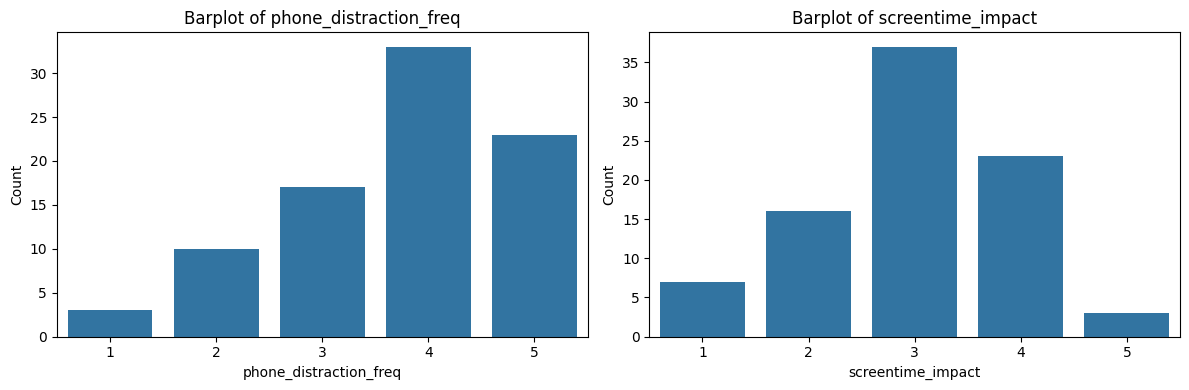

In [16]:
def plot_bar_distribution(df, cols):
    plt.figure(figsize=(12, 4))

    for i, col in enumerate(cols):
        plt.subplot(1, 2, i + 1)
        sns.countplot(x=df[col])
        plt.title(f'Barplot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

plot_bar_distribution(df, numerical)

From the Phone_distraction_freq column, we can see that most respondents selected a score of 4, which indicates that they frequently feel distracted by their phones while studying. Similarly, for the screentime_impact column, the majority of responses are around 3, suggesting that students generally perceive screentime as having a moderate impact on their academic performance — neither strongly negative nor strongly positive.

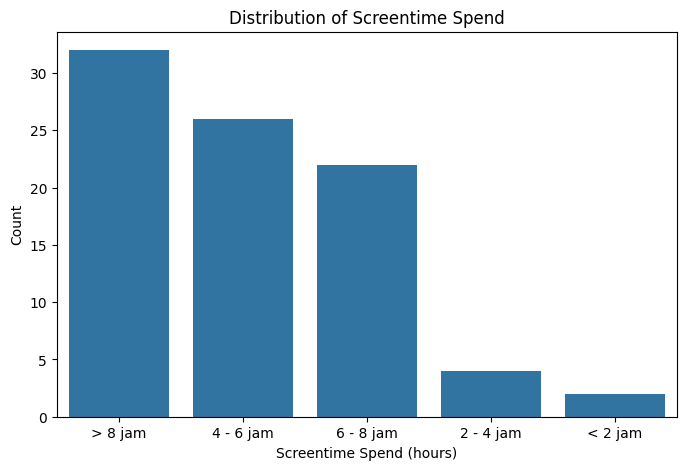

In [17]:
order = df['screentime_spend'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='screentime_spend', order=order)
plt.title('Distribution of Screentime Spend')
plt.xlabel('Screentime Spend (hours)')
plt.ylabel('Count')
plt.show()

From the screentime_spend column, we can observe that most students reported spending more than 8 hours per day on screens. This was followed by those in the 6-8 hours and 4-6 hours ranges. This trend suggests that a significant portion of students are engaging in extended daily screentime.

In [18]:
def extract_categories(column):
    all_categories = []
    for entry in df[column]:
      if pd.isna(entry) or entry == 0:
        continue
      matches = re.findall(r'([^\(,]+)\s*\([^\)]*\)', entry)
      if matches:
        all_categories.extend([m.strip() for m in matches])
      else:
        categories = [cat.strip() for cat in entry.split(',')]
        all_categories.extend(categories)
    return Counter(all_categories)

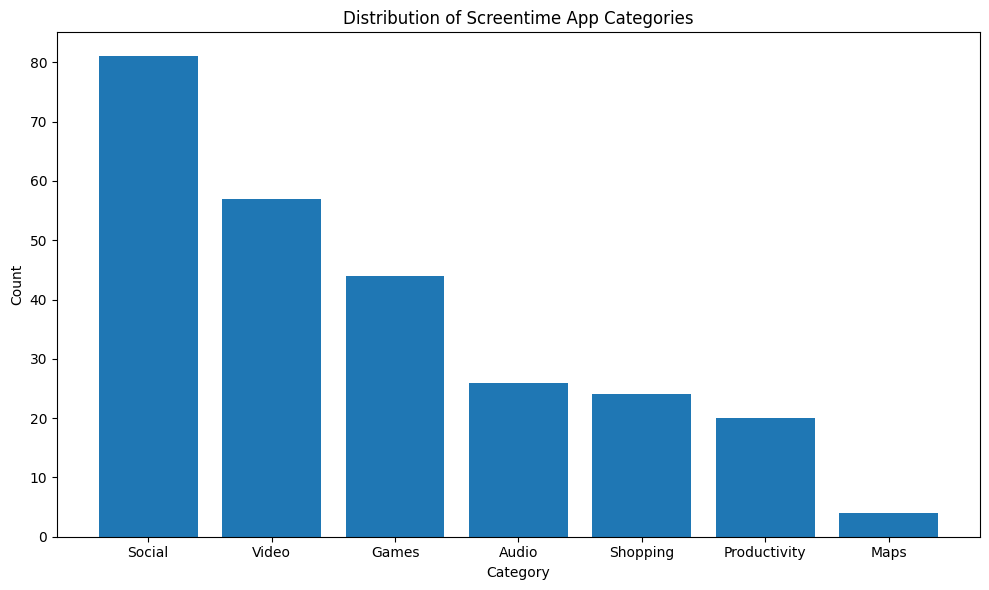

In [19]:
screentime_counts = extract_categories('screentime_app')
screentime_df = pd.DataFrame(screentime_counts.items(), columns=['Category', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(screentime_df['Category'], screentime_df['Count'])
plt.title('Distribution of Screentime App Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

From the screentime_app column, it can be seen that most people use social media, video, and gaming applications in their daily lives. This indicates that screen time is largely spent on entertainment and social interaction, which reflects common digital behavior patterns in today’s society.

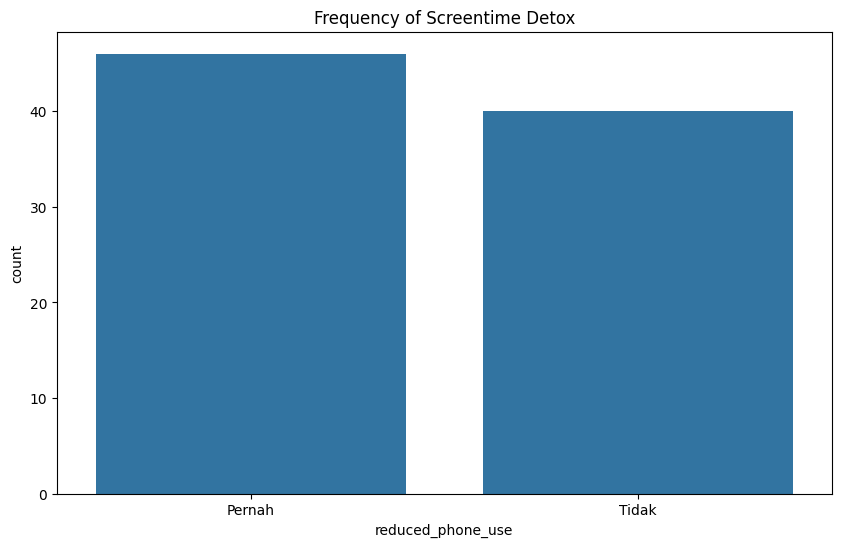

In [20]:
plt.figure(figsize=(10, 6))
plt.title('Frequency of Screentime Detox')
sns.countplot(data=df, x='reduced_phone_use')
plt.show()

From the bar plot above, we can also see that for the reduced_phone_use column (which measures whether someone has ever tried to reduce their screen time or done a screen time detox), our survey shows that most people have attempted a screen time detox.

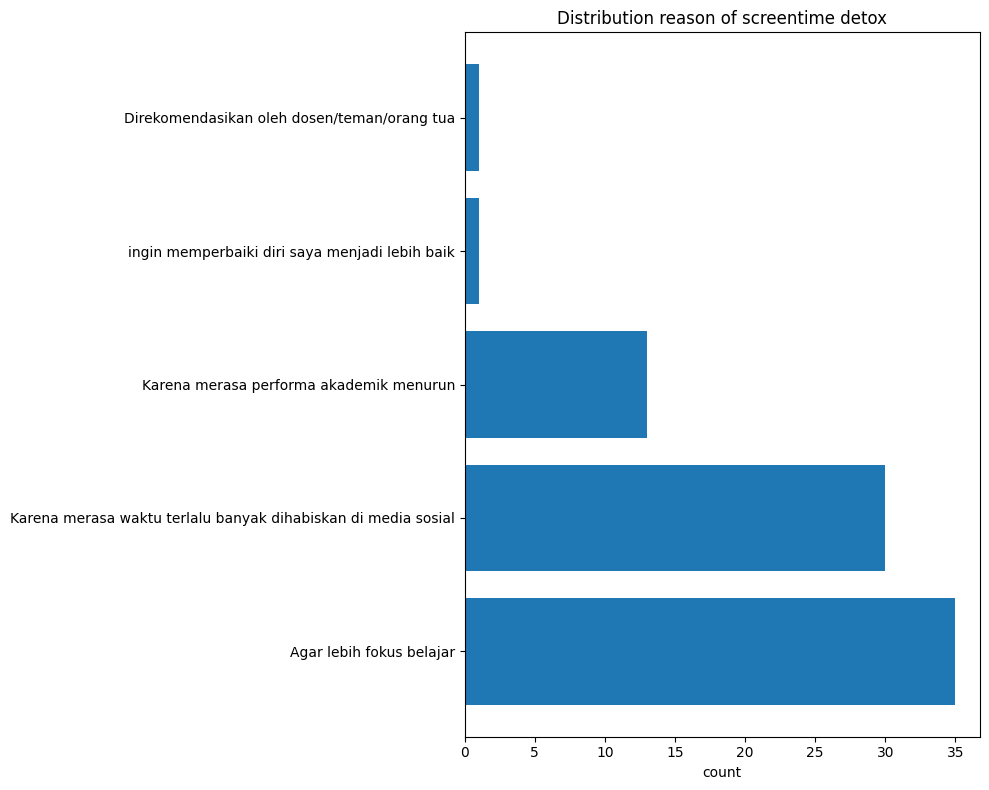

In [21]:
reduction_counts = extract_categories('reduction_reason')
reduction_df = pd.DataFrame(reduction_counts.items(), columns=['Reason', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(reduction_df['Reason'], reduction_df['Count'])
plt.xlabel('count')
plt.title('Distribution reason of screentime detox')
plt.tight_layout()
plt.show()

The plot above shows the reasons why respondents chose to do a screen time detox. It can be seen that the most common reason is the desire to focus on studying, which makes a lot of sense considering that our respondents are university students. Naturally, they often feel distracted while studying.

In [22]:
for i in df.columns:
  print(i)
  print(df[i].unique())
  print("")

major
['Data Science' 'Computer Science']

screentime_spend
['6 - 8 jam' '2 - 4 jam' '> 8 jam' '4 - 6 jam' '< 2 jam']

screentime_app
['Social (WhatsApp, LINE, Instagram, X, Tiktok), Games (Fortnite, Mobile Legends), Productivity (Notes, Calendar, BinusMaya)'
 'Social (WhatsApp, LINE, Instagram, X, Tiktok), Video (YouTube, Netflix), Games (Fortnite, Mobile Legends)'
 'Video (YouTube, Netflix), Games (Fortnite, Mobile Legends), Productivity (Notes, Calendar, BinusMaya)'
 'Social (WhatsApp, LINE, Instagram, X, Tiktok), Video (YouTube, Netflix), Productivity (Notes, Calendar, BinusMaya)'
 'Social (WhatsApp, LINE, Instagram, X, Tiktok), Shopping (Shopee, Tokopedia, Grab, Gojek), Audio (Spotify, Apple Music, Joox)'
 'Social (WhatsApp, LINE, Instagram, X, Tiktok), Video (YouTube, Netflix), Audio (Spotify, Apple Music, Joox)'
 'Social (WhatsApp, LINE, Instagram, X, Tiktok), Games (Fortnite, Mobile Legends), Shopping (Shopee, Tokopedia, Grab, Gojek)'
 'Social (WhatsApp, LINE, Instagram, X, Tik

# Inferential Analysis

## Cross Tabulation

In [23]:
def extract_app(entry):
    if pd.isna(entry):
        return []
    matches = re.findall(r'([^\(,]+)\s*\([^\)]*\)', entry)
    if matches:
        return [m.strip() for m in matches]
    else:
        return [cat.strip() for cat in entry.split(',')]
df_copy = df.copy()
df_copy['app_list'] = df_copy['screentime_app'].apply(extract_app)
df_exploded = df_copy.explode('app_list')
pd.crosstab(df_exploded['GPS'], df_exploded['app_list'])

app_list,Audio,Games,Maps,Productivity,Shopping,Social,Video
GPS,,,,,,,
2.00 - 2.99,3,3,0,2,1,4,2
3.00 - 3.49,10,17,3,3,8,27,16
3.5 - 3.89,10,19,0,11,11,36,27
< 2.00,1,0,1,0,1,0,0
> 3.90,2,5,0,4,3,14,12


In [24]:
pd.crosstab(df['GPS'],df['phone_distraction_freq'])

phone_distraction_freq,1,2,3,4,5
GPS,,,,,
2.00 - 2.99,0,0,2,2,1
3.00 - 3.49,0,4,4,11,9
3.5 - 3.89,2,5,7,16,8
< 2.00,1,0,0,0,0
> 3.90,0,1,4,4,5


In [25]:
pd.crosstab(df['GPS'],df['screentime_impact'])

screentime_impact,1,2,3,4,5
GPS,,,,,
2.00 - 2.99,1,3,1,0,0
3.00 - 3.49,4,4,13,7,0
3.5 - 3.89,1,6,17,12,2
< 2.00,0,1,0,0,0
> 3.90,1,2,6,4,1


## Preprocessing
Encoding was applied to the reduced_phone_use column using label encoder, as it contains binary data.

In [26]:
label = LabelEncoder()
label.classes_ = np.array(['Tidak', 'Pernah'])
df['reduced_phone_use'] = label.transform(df['reduced_phone_use'])

Ordinal encoding was applied to the screentime_spend and GPS columns, as the values in these columns follow a meaningful order or ranking.

In [27]:
cols = ['screentime_spend', 'GPS']

ordinal = OrdinalEncoder(categories=[
    ['< 2 jam', '2 - 4 jam', '4 - 6 jam', '6 - 8 jam', '> 8 jam'],
    ['< 2.00', '2.00 - 2.99', '3.00 - 3.49', '3.5 - 3.89', '> 3.90']
])
encoded = ordinal.fit_transform(df[cols])
df[cols] = encoded

In this analysis, we assigned weights to the screentime_spend and reduction_reason columns to better quantify each respondent's screen time habits and motivations for detox. For screentime_spend, higher weights were given to categories like Social (7), Video (6), and Games (5), as these apps are typically more time-consuming and potentially more distracting. Lower weights were assigned to categories such as Health and Image, which generally require less screen engagement. This allows us to estimate the overall screen time intensity based on the types of apps used. For reduction_reason, we assigned higher weights to self-motivated reasons like “To focus better on studying” (4) and “Because too much time was spent on social media” (3), while externally driven reasons like “Recommended by others” were given lower weights (1). This approach helps distinguish between intrinsic and extrinsic motivation, allowing for deeper insight into screen time behaviors and the likelihood of sustained behavioral change.

In [28]:
apps_weights = {
    'Social': 7,
    'Video': 6,
    'Games': 5,
    'Audio': 4,
    'Shopping': 3,
    'Productivity': 2,
    'Maps': 1,
}
reduction_weights = {
    'Agar lebih fokus belajar': 4,
    'Karena merasa waktu terlalu banyak dihabiskan di media sosial': 3,
    'Karena merasa performa akademik menurun': 2,
    'Direkomendasikan oleh dosen/teman/orang tua': 1,
}

In [29]:
def calculate_total_weight(entry, weight_map):
    if pd.isnull(entry):
        return 0
    total = 0
    for category in weight_map:
        if category in entry:
            total += weight_map[category]
    return total


In [30]:
df['screentime_app'] = df['screentime_app'].apply(lambda x: calculate_total_weight(x, apps_weights))
df['reduction_reason'] = df['reduction_reason'].astype(str)
df['reduction_reason'] = df['reduction_reason'].apply(lambda x: calculate_total_weight(x, reduction_weights))

In [31]:
df.head(5)

,major,screentime_spend,screentime_app,phone_distraction_freq,reduced_phone_use,reduction_reason,GPS,screentime_impact,screentime_on_learning,weight
0,Data Science,3.0,14,3,1,3,2.0,4,membantu saya untuk rehat sejenak ketika sudah...,4.404762
1,Data Science,1.0,18,2,1,7,2.0,3,mengganggu konsentrasi,4.404762
2,Data Science,4.0,13,5,0,0,3.0,4,sering menggunakan untuk hal produktif,4.404762
3,Data Science,2.0,15,3,1,3,3.0,3,"tergantung, karena jika kebanyakan screen time...",4.404762
4,Data Science,3.0,14,5,0,0,3.0,3,screen time handphone dapat membuat saya kehil...,4.404762


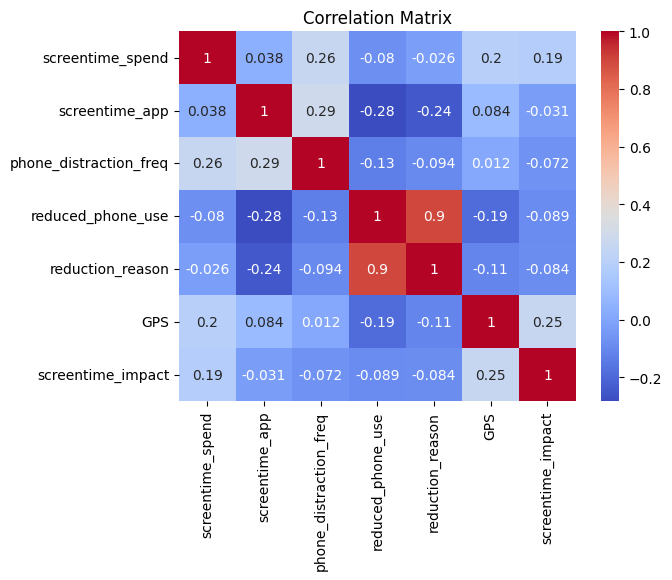

In [32]:
corr = df.drop(['screentime_on_learning','major','weight'], axis =1).corr(method='spearman')
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Reliability Test

In [33]:
alpha = pg.cronbach_alpha(data=df[['screentime_spend','phone_distraction_freq','screentime_impact']])
print(f'Cronbach Alpha: {alpha[0]:.3f}')

Cronbach Alpha: 0.238


The Cronbach's Alpha value of 0.238 indicates that the internal consistency among the measured items is very low. This suggests that the three variables—screentime_spend, phone_distraction_freq, and screentime_impact—do not correlate strongly with each other, and therefore may not be measuring a single underlying construct.

In [34]:
ordinal_cols = [
    'screentime_impact',
    'phone_distraction_freq',
    'screentime_spend',
]

data_for_efa = df[ordinal_cols].dropna()

kmo_all, kmo_model = calculate_kmo(data_for_efa)
print("KMO Score:", round(kmo_model, 3))

chi_square_value, p_value = calculate_bartlett_sphericity(data_for_efa)
print("Bartlett’s Test p-value:", round(p_value, 5))

fa = FactorAnalyzer(n_factors=len(ordinal_cols), rotation=None)
fa.fit(data_for_efa)

ev, v = fa.get_eigenvalues()

print("\nEigenvalues:")
for i, val in enumerate(ev):
    print(f"Factor {i+1}: {round(val, 3)}")

fa = FactorAnalyzer(n_factors=2, rotation="varimax")
fa.fit(data_for_efa)

factor_loadings_df = pd.DataFrame(fa.loadings_, index=data_for_efa.columns).reset_index()
factor_loadings_df.columns = ['Question', 'Distraction Level', 'Usage Behavior']

print("\nFactor Loadings:")
print(factor_loadings_df.to_string(index=False))


KMO Score: 0.434
Bartlett’s Test p-value: 0.03889

Eigenvalues:
Factor 1: 1.25
Factor 2: 1.08
Factor 3: 0.67

Factor Loadings:
              Question  Distraction Level  Usage Behavior
     screentime_impact          -0.005787        0.494589
phone_distraction_freq           0.556259       -0.203433
      screentime_spend           0.544455        0.266115


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


This factor analysis was conducted to assess construct validity. The KMO score of 0.434 indicates poor sampling adequacy, while the significant Bartlett’s Test (p = 0.03889) suggests that the variables are correlated enough for factor analysis. Two factors were extracted based on eigenvalues, with phone_distraction_freq and screentime_spend loading on one factor (related to distraction or usage), and screentime_impact loading on another (perceived impact). However, due to the low KMO score and limited number of items, the construct validity remains weak

# Text Preprocessing

In [35]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian')).union(stopwords.words('english'))

custom_stopwords = {'saya','untuk','sejenak','ketika','sudah','merasa','saat','belajar','sering','menggunakan','untuk','hal',
                    'tergantung','dapat','membuat','dan','tidak','yang','lebih','banyak','karena','sebagian','besar','tapi','cukup',
                    'gadget','handphone','hp','seringkali','karna','bisa','atur','membuka','sosmed','lebih','biasa','aja','sebenarnya','dari',
                    'semakin','tinggi','membuat','ngurangin','kalo','lagi','gps','otak','tugas','kegiatan','screen','time','media','main','performa',
                    'proses','mengurangi','pembelajaran','fokus','konsentrasi','berkurang','berpengaruh','mudah','game','menonton','youtube'
                    ,'scroll','akademik','materi','sosial','penggunaan','ga','malas','mempengaruhi','kegiatan','kebiasaan','memengaruhi','nilai',
                    'tiktok', 'coding','social','terpakai','buka','video','dosen','ujian','bagus','mata','sulit','pribadi','smartphone','mengatur','pengaruh'}
stop_words.update(custom_stopwords)

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    stemmed = [stemmer.stem(word) for word in words]
    return ' '.join(words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [36]:
cleaned_series = df['screentime_on_learning'].dropna().apply(clean_text)
all_text = ' '.join(cleaned_series)

words = all_text.split()
word_freq = Counter(words)

top_10 = word_freq.most_common(10)
print("Top 10 Most Frequent Words:")
for word, freq in top_10:
    print(f"{word}")

Top 10 Most Frequent Words:
terdistraksi
membantu
menurun
mengganggu
produktif
meningkat
mendistraksi
distraksi
produktivitas
berguna


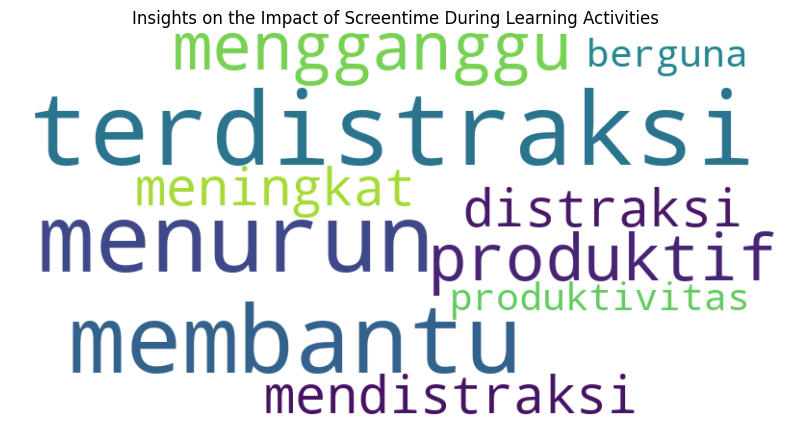

In [37]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white',max_words=10).generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Insights on the Impact of Screentime During Learning Activities")
plt.show()

The top 10 most frequent words reflect mixed views on screentime during learning. Words like “terdistraksi,” “mengganggu,” and “menurun” show that many students feel it reduces focus and productivity, while terms such as “membantu,” “produktif,” and “berguna” suggest that others find it supportive. This indicates that screentime is seen both as a distraction and a useful tool, depending on how it is used.



In [38]:
df.to_csv('DataAfter_2.csv', index=False)